In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import pathlib

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


First, we will import the 2018 CDC raw data file.

In [8]:
data_folder = Path('/home/tim/Documents/cdc_infant/data/raw')

data_file = data_folder / 'natl2018us.csv'

df = pd.read_csv(data_file)

PosixPath('/home/tim/Documents/cdc_infant/data/raw/natl2018us.csv')

In [56]:
# use df.head() to get a rough view of what the dataframe look likes
df.head()

,dob_yy,dob_mm,dob_tt,dob_wk,bfacil,f_facility,bfacil3,mage_impflg,mage_repflg,mager,...,ume_forcep,ume_vac,uop_induc,uld_breech,uca_anen,uca_spina,uca_ompha,uca_cleftlp,uca_hernia,uca_downs
0,2018,1,1227,2,1,1,1,NaN,NaN,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018,1,1704,2,1,1,1,NaN,NaN,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018,1,336,2,1,1,1,NaN,NaN,28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018,1,938,2,1,1,1,NaN,NaN,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018,1,830,3,1,1,1,NaN,NaN,37,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Check the shape of the dataframe and make sure it lines up with what the documentation says.

In [54]:
df.shape

(3801534, 240)

Alright! The df has 3,801,534 rows (births). There are 240 columns. The documentation (the pdf from the CDC website) matches up. So we're good to go.

Now, data exploration is all about getting a feel for the data. What makes sense, what doesn't make sense. Are there any problems? Looking at the df.head(), I see a bunch of NANs. Could there be some columns that have too many NaNs, and thus are not useful in many analysis? Let's explore that...

In [58]:
# lets get a list of all the columns first
list(df.columns)

['dob_yy',
 'dob_mm',
 'dob_tt',
 'dob_wk',
 'bfacil',
 'f_facility',
 'bfacil3',
 'mage_impflg',
 'mage_repflg',
 'mager',
 'mager14',
 'mager9',
 'mbstate_rec',
 'restatus',
 'mrace31',
 'mrace6',
 'mrace15',
 'mbrace',
 'mraceimp',
 'mhisp_r',
 'f_mhisp',
 'mracehisp',
 'mar_p',
 'dmar',
 'mar_imp',
 'f_mar_p',
 'meduc',
 'f_meduc',
 'fagerpt_flg',
 'fagecomb',
 'fagerec11',
 'frace31',
 'frace6',
 'frace15',
 'fbrace',
 'fhisp_r',
 'f_fhisp',
 'fracehisp',
 'feduc',
 'priorlive',
 'priordead',
 'priorterm',
 'lbo_rec',
 'tbo_rec',
 'illb_r',
 'illb_r11',
 'ilop_r',
 'ilop_r11',
 'ilp_r',
 'ilp_r11',
 'precare',
 'f_mpcb',
 'precare5',
 'previs',
 'previs_rec',
 'f_tpcv',
 'wic',
 'f_wic',
 'cig_0',
 'cig_1',
 'cig_2',
 'cig_3',
 'cig0_r',
 'cig1_r',
 'cig2_r',
 'cig3_r',
 'f_cigs_0',
 'f_cigs_1',
 'f_cigs_2',
 'f_cigs_3',
 'cig_rec',
 'f_tobaco',
 'm_ht_in',
 'f_m_ht',
 'bmi',
 'bmi_r',
 'pwgt_r',
 'f_pwgt',
 'dwgt_r',
 'f_dwgt',
 'wtgain',
 'wtgain_rec',
 'f_wtgain',
 'rf_pdiab',


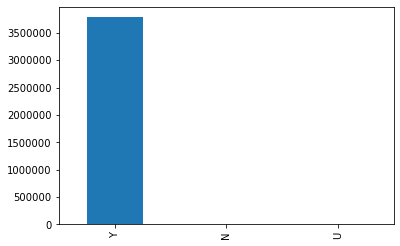

In [62]:
pd.value_counts(df['ilive'], dropna=False).plot.bar()

In pandas, you can chain together methods. We'll do this to find out how many NaNs there are for each column.

In [64]:
# I want to find all the columns that have NaNs in them
# we can use isnull, combined with sum
# this sums up all the NaNs in each column
df.isnull().sum()

dob_yy               0
dob_mm               0
dob_tt               0
dob_wk               0
bfacil               0
                ...   
uca_spina      3801534
uca_ompha      3801534
uca_cleftlp    3801534
uca_hernia     3801534
uca_downs      3801534
Length: 240, dtype: int64

The above is a pandas series that has a count of the NaNs in each column. Clearly, some of the columns are useless (only NaNs). Let's plot these in a quick and dirty bar chart to see if there are any other columns that have a lot of NaNs.

It's often nice to plot things visually, as it can sometimes be easier to find trends.

<BarContainer object of 240 artists>

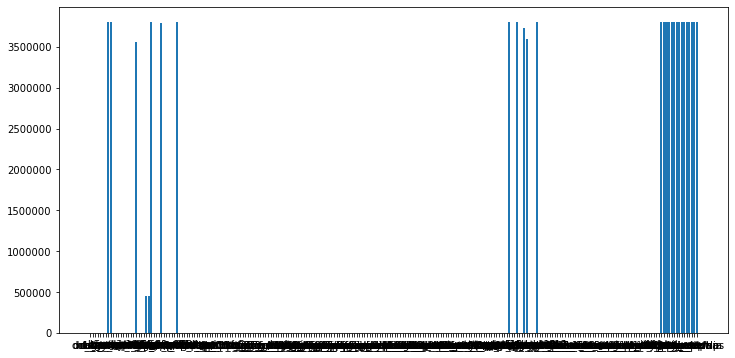

In [71]:
# use matplotlib, and change the figsize so that the chart is wider
fig, ax = plt.subplots(figsize=(12,6))

ax.bar(x=df.isnull().sum().index, height=df.isnull().sum())

The above bar-chart is kinda disorganized. Let's get rid of all the columns that we know of zero NaNs.

In [72]:
# use boolean indexing on the series to only select columns 
# with NaNs, https://stackoverflow.com/a/42968903
# also use sort_values, and sort descending

s = df.isnull().sum().sort_values(ascending=False)
s = s[s > 0] # boolean indexing
s

uca_downs      3801534
ume_forcep     3801534
uca_hernia     3801534
fbrace         3801534
ubfacil        3801534
urf_diab       3801534
urf_chyper     3801534
urf_phyper     3801534
urf_eclam      3801534
ume_vac        3801534
uop_induc      3801534
uld_breech     3801534
uca_anen       3801534
uca_spina      3801534
uca_ompha      3801534
uca_cleftlp    3801534
mage_repflg    3801477
imp_sex        3801444
imp_plur       3801368
mage_impflg    3801060
mar_imp        3799539
lmpused        3799387
fagerpt_flg    3796678
compgst_imp    3735677
obgest_flg     3600696
mraceimp       3561344
mar_p           456083
dmar            456083
dtype: int64

Ah, that's much better. We can see from the above series which columns have too many NaNs. We'll keep this in the back of our mind, as some of these features might still be useful.

KeyboardInterrupt: 

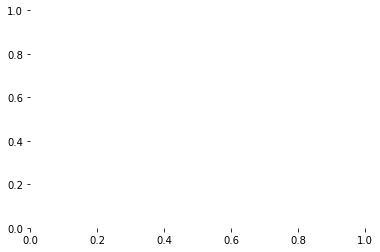

In [66]:
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [63]:
df.isnull()

,dob_yy,dob_mm,dob_tt,dob_wk,bfacil,f_facility,bfacil3,mage_impflg,mage_repflg,mager,...,ume_forcep,ume_vac,uop_induc,uld_breech,uca_anen,uca_spina,uca_ompha,uca_cleftlp,uca_hernia,uca_downs
0,False,False,False,False,False,False,False,True,True,False,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,True,True,False,...,True,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,False,True,True,False,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,True,True,False,...,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,True,True,False,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3801529,False,False,False,False,False,False,False,True,True,False,...,True,True,True,True,True,True,True,True,True,True
3801530,False,False,False,False,False,False,False,True,True,False,...,True,True,True,True,True,True,True,True,True,True
3801531,False,False,False,False,False,False,False,True,True,False,...,True,True,True,True,True,True,True,True,True,True
3801532,False,False,False,False,False,False,False,True,True,False,...,True,True,True,True,True,True,True,True,True,True


In [41]:
df1.isnull().sum().index

Index(['dob_yy', 'dob_mm', 'dob_tt', 'dob_wk', 'bfacil', 'f_facility',
       'bfacil3', 'mage_impflg', 'mage_repflg', 'mager',
       ...
       'ume_forcep', 'ume_vac', 'uop_induc', 'uld_breech', 'uca_anen',
       'uca_spina', 'uca_ompha', 'uca_cleftlp', 'uca_hernia', 'uca_downs'],
      dtype='object', length=240)

<BarContainer object of 240 artists>

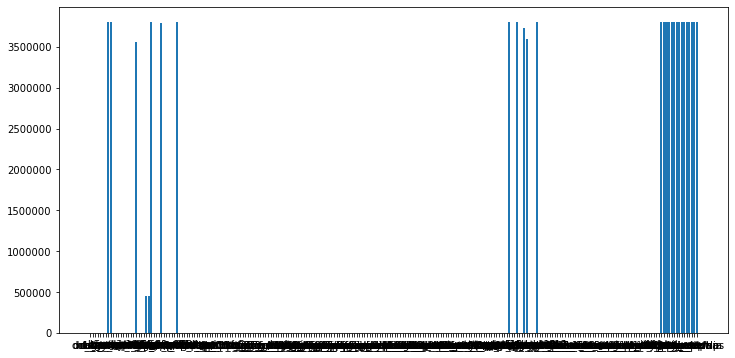

In [48]:
fig, ax = plt.subplots(figsize=(12,6))

ax.bar(x=df.isnull().sum().index, height=df.isnull().sum())

In [53]:
# use boolean indexing on the series to find out which values
# have a lot of NaNs, https://stackoverflow.com/a/42968903

s = df.isnull().sum().sort_values(ascending=False)
s[s > 10]

uca_downs      3801534
ume_forcep     3801534
uca_hernia     3801534
fbrace         3801534
ubfacil        3801534
urf_diab       3801534
urf_chyper     3801534
urf_phyper     3801534
urf_eclam      3801534
ume_vac        3801534
uop_induc      3801534
uld_breech     3801534
uca_anen       3801534
uca_spina      3801534
uca_ompha      3801534
uca_cleftlp    3801534
mage_repflg    3801477
imp_sex        3801444
imp_plur       3801368
mage_impflg    3801060
mar_imp        3799539
lmpused        3799387
fagerpt_flg    3796678
compgst_imp    3735677
obgest_flg     3600696
mraceimp       3561344
mar_p           456083
dmar            456083
dtype: int64

In [17]:
df['mar_p'].unique()

array(['X', 'Y', 'N', 'U', nan], dtype=object)

In [32]:
df['dmar'].groupby(by=df['dmar'].unique())

ValueError: Grouper and axis must be same length

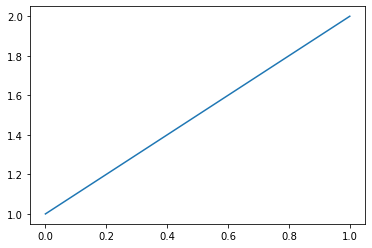

In [29]:
plt.plot(df['dmar'].unique())

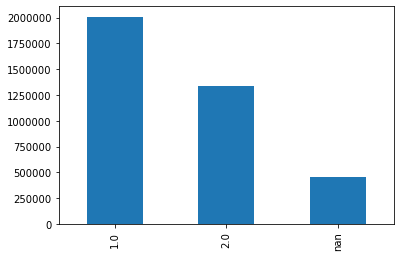

In [27]:
pd.value_counts(df['dmar'], dropna=False).plot.bar()